In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/areum/Documents/ISLR/Weekly.csv', index_col=0, usecols=range(1,10) ,parse_dates=True)

In [3]:
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
1990-01-01,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1990-01-01,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
1990-01-01,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
1990-01-01,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
1990-01-01,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1089 entries, 1990-01-01 to 2010-01-01
Data columns (total 8 columns):
Lag1         1089 non-null float64
Lag2         1089 non-null float64
Lag3         1089 non-null float64
Lag4         1089 non-null float64
Lag5         1089 non-null float64
Volume       1089 non-null float64
Today        1089 non-null float64
Direction    1089 non-null object
dtypes: float64(7), object(1)
memory usage: 76.6+ KB


In [5]:
df.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

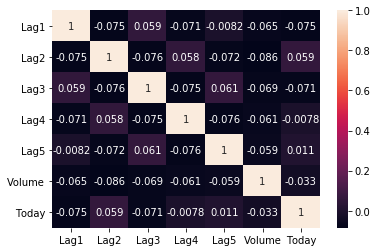

In [7]:
sns.heatmap(df.corr(), annot=True)

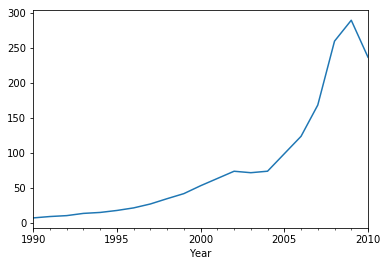

In [8]:
df.groupby('Year')['Volume'].sum().plot()

In [9]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

/Users/areum/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'

In [11]:
mod1 = smf.glm(formula=formula, data=df, family=sm.families.Binomial())

In [12]:
result = mod1.fit()

In [13]:
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Tue, 20 Mar 2018   Deviance:                       1486.4
Time:                                          21:49:08   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

In [14]:
pred = result.predict()

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
mod1.endog

array([ 1.,  1.,  0., ...,  0.,  0.,  0.])

In [17]:
pred

array([ 0.39137506,  0.39896856,  0.41243005, ...,  0.42027703,
        0.44908297,  0.47787837])

In [18]:
pred_nominal = ['Up' if x < 0.5 else 'Down' for x in pred]

In [19]:
print(classification_report(df['Direction'], pred_nominal, digits=3))

             precision    recall  f1-score   support

       Down      0.529     0.112     0.184       484
         Up      0.564     0.921     0.700       605

avg / total      0.549     0.561     0.471      1089



In [20]:
print(confusion_matrix(df['Direction'], pred_nominal))

[[ 54 430]
 [ 48 557]]


In [21]:
df.groupby('Direction')['Direction'].count()

Direction
Down    484
Up      605
Name: Direction, dtype: int64

## Logstic - Training and Test set

In [22]:
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
1990-01-01,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1990-01-01,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
1990-01-01,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
1990-01-01,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
1990-01-01,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [23]:
X_train = df[:'2009'][:]
y_train = df[:'2009']['Direction']
X_test = df['2009':][:]
y_test = df['2009':]['Direction']

In [24]:
formula2 = 'Direction ~ Lag2'

In [25]:
mod2 = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())

In [26]:
result2 = mod2.fit()

In [27]:
print(result2.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1037
Model:                                              GLM   Df Residuals:                     1030
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -709.06
Date:                                  Tue, 20 Mar 2018   Deviance:                       1418.1
Time:                                          21:49:16   Pearson chi2:                 1.04e+03
No. Iterations:                                       4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

In [28]:
pred2 = result2.predict(X_test)

In [29]:
pred_nominal2 = ['Up' if x < 0.5 else 'Down' for x in pred2]

In [30]:
print(classification_report(y_test, pred_nominal2))

             precision    recall  f1-score   support

       Down       0.46      0.40      0.42        43
         Up       0.61      0.67      0.64        61

avg / total       0.55      0.56      0.55       104



In [31]:
print(confusion_matrix(y_test, pred_nominal2))

[[17 26]
 [20 41]]


## LDA

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [33]:
lda = LinearDiscriminantAnalysis()

In [34]:
X_train_lda = df[:'2009']['Lag2']
y_train_lda = df[:'2009']['Direction']
X_test_lda = df['2009':]['Lag2']
y_test_lda = df['2009':]['Direction']

In [35]:
X_train_lda = X_train_lda.reshape(-1,1)

/Users/areum/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [36]:
lda.fit(X_train_lda, y_train_lda)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [37]:
lda.priors_

array([ 0.44744455,  0.55255545])

In [38]:
lda.means_

array([[-0.01205819],
       [ 0.27317277]])

In [39]:
lda.coef_

array([[ 0.05156658]])

In [40]:
y_train_lda.value_counts() / y_train_lda.count()

Up      0.552555
Down    0.447445
Name: Direction, dtype: float64

In [41]:
X_test_lda = X_test_lda.reshape(-1,1)

/Users/areum/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [42]:
lda_pred = lda.predict(X_test_lda)

In [43]:
print(np.unique(lda_pred, return_counts=True))

(array(['Down', 'Up'],
      dtype='<U4'), array([11, 93]))


In [44]:
print(classification_report(y_test, lda_pred))

             precision    recall  f1-score   support

       Down       0.64      0.16      0.26        43
         Up       0.61      0.93      0.74        61

avg / total       0.62      0.62      0.54       104



In [45]:
print(confusion_matrix(y_test, lda_pred))

[[ 7 36]
 [ 4 57]]


## QDA

In [46]:
qda = QuadraticDiscriminantAnalysis()

In [47]:
X_train_qda = df[:'2009']['Lag2']
y_train_qda = df[:'2009']['Direction']
X_test_qda = df['2009':]['Lag2']
y_test_qda = df['2009':]['Direction']

In [48]:
X_train_qda = X_train_qda.reshape(-1, 1)

/Users/areum/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [49]:
qda.fit(X_train_qda, y_train_qda)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [50]:
qda.priors_

array([ 0.44744455,  0.55255545])

In [51]:
qda.means_

array([[-0.01205819],
       [ 0.27317277]])

In [52]:
X_test_qda = X_test_qda.reshape(-1, 1)

/Users/areum/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [53]:
qda_pred = qda.predict(X_test_qda)

In [54]:
print(np.unique(qda_pred, return_counts=True))

(array(['Up'], dtype=object), array([104]))


In [55]:
print(classification_report(y_test_qda, qda_pred))

             precision    recall  f1-score   support

       Down       0.00      0.00      0.00        43
         Up       0.59      1.00      0.74        61

avg / total       0.34      0.59      0.43       104



/Users/areum/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
print(confusion_matrix(y_test_qda, qda_pred))

[[ 0 43]
 [ 0 61]]


## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=1)

In [59]:
knn.fit(X_train_qda, y_train_qda)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [60]:
knn_pred = knn.predict(X_test_qda)

In [61]:
print(classification_report(y_test_qda, knn_pred))

             precision    recall  f1-score   support

       Down       0.67      0.70      0.68        43
         Up       0.78      0.75      0.77        61

avg / total       0.73      0.73      0.73       104



In [62]:
print(confusion_matrix(y_test_qda, knn_pred))

[[30 13]
 [15 46]]
